# 3.4. Creating custom Jupyter Notebook widgets in Python, HTML, and JavaScript

In [1]:
import ipywidgets as widgets
from traitlets import Unicode, Int, validate

In [2]:
class CounterWidget(widgets.DOMWidget):
    _view_name = Unicode('CounterView').tag(sync=True)
    _view_module = Unicode('counter').tag(sync=True)
    value = Int(0).tag(sync=True)

In [3]:
%%javascript
// We make sure the `counter` module is defined
// only once.
require.undef('counter');

// We define the `counter` module depending on the
// Jupyter widgets framework.
define('counter', ["@jupyter-widgets/base"],
       function(widgets) {

    // We create the CounterView frontend class,
    // deriving from DOMWidgetView.
    var CounterView = widgets.DOMWidgetView.extend({

        // This method creates the HTML widget.
        render: function() {
            // The value_changed() method should be
            // called when the model's value changes
            // on the kernel side.
            this.value_changed();
            this.model.on('change:value',
                          this.value_changed, this);

            var model = this.model;
            var that = this;

            // We create the plus and minus buttons.
            this.bm = $('<button/>')
            .text('-')
            .click(function() {
                // When the button is clicked,
                // the model's value is updated.
                var x = model.get('value');
                model.set('value', x - 1);
                that.touch();
            });

            this.bp = $('<button/>')
            .text('+')
            .click(function() {
                var x = model.get('value');
                model.set('value', x + 1);
                that.touch();
            });

            // This element displays the current
            // value of the counter.
            this.span = $('<span />')
            .text('0')
            .css({marginLeft: '10px',
                  marginRight: '10px'});

            // this.el represents the widget's DOM
            // element. We add the minus button,
            // the span element, and the plus button.
            $(this.el)
            .append(this.bm)
            .append(this.span)
            .append(this.bp);
        },

        value_changed: function() {
            // Update the displayed number when the
            // counter's value changes.
            var x = this.model.get('value');
            $($(this.el).children()[1]).text(x);
        },
    });

    return {
        CounterView : CounterView
    };
});

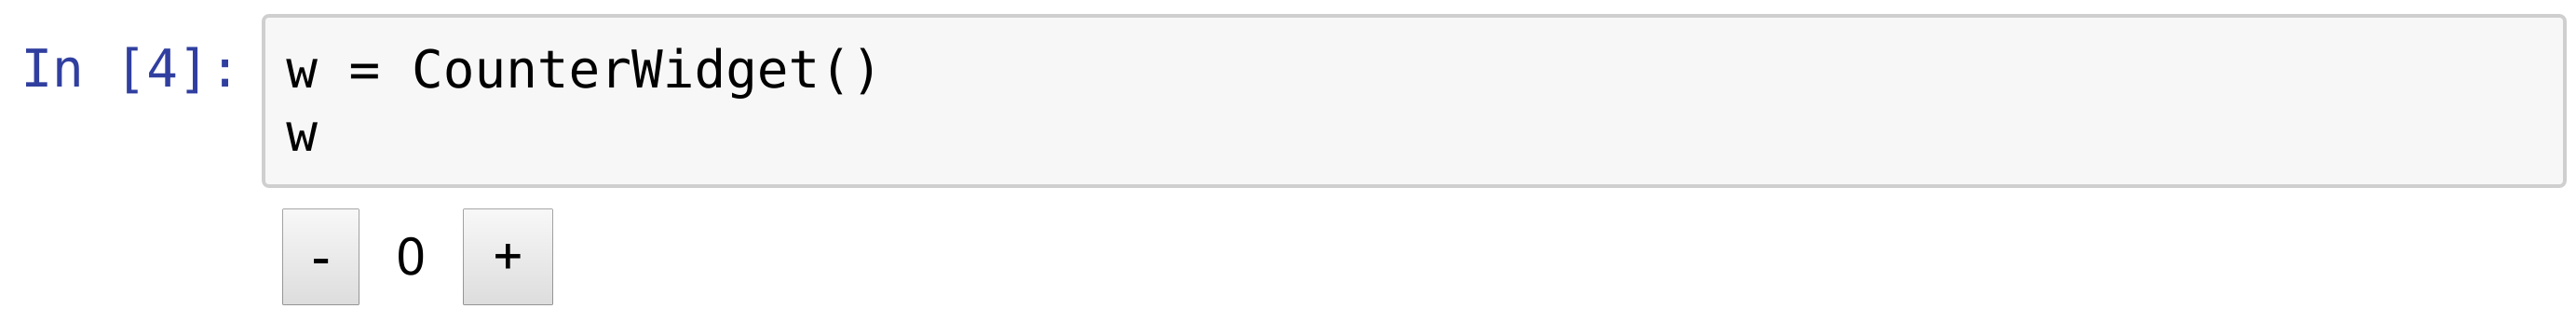

In [4]:
w = CounterWidget()
w

In [5]:
print(w.value)

4


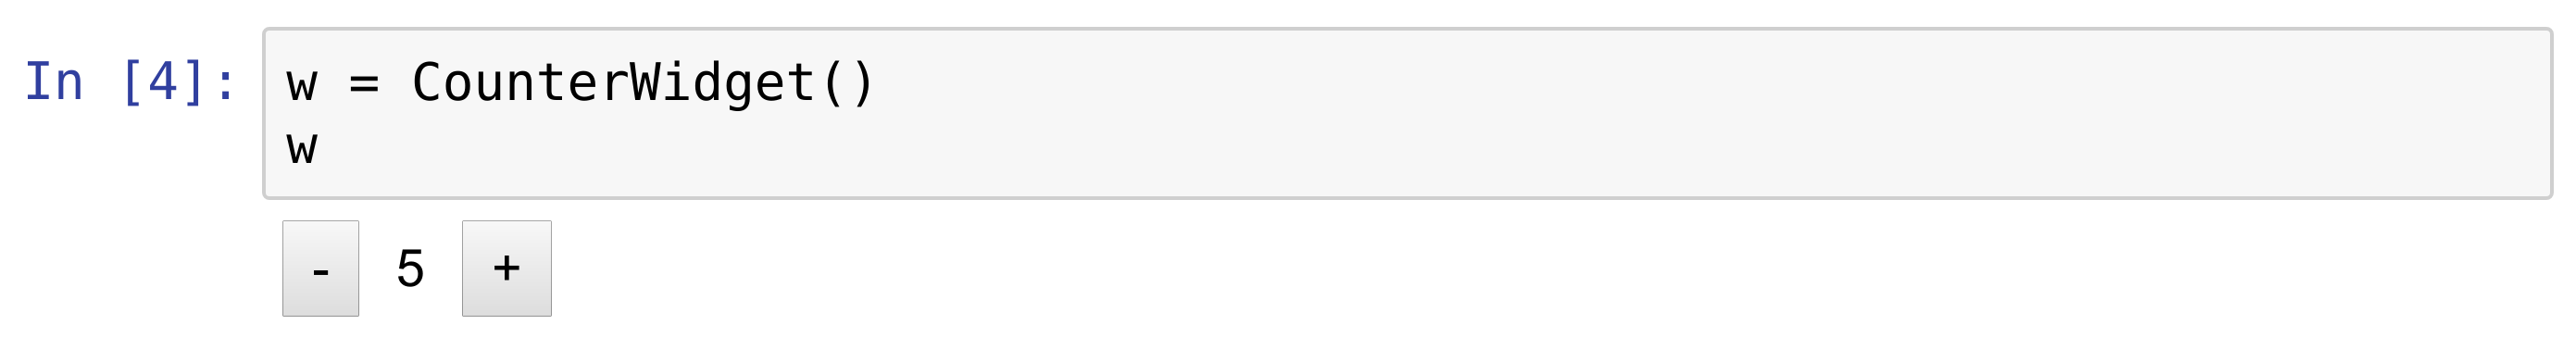

In [6]:
w.value = 5